In [1]:
%load_ext autoreload
%autoreload 2
import diverse_yeast_tools as dyt
import os
import pickle
import numpy as np
import pandas as pd
import json
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
## Ipath image of selected genes 

In [3]:
base_dir = os.path.normpath('G:/My Drive/Crick_LMS/projects/diverse_yeasts/alphafold')

#Go from : G:\My Drive\Crick_LMS\projects\diverse_yeasts\alphafold\selected_proteins\og_metadata.json
#Make a dictionary to map to Uniprot Names
#Export list, see what is present in Ipath

#Load og_metadata (used to be called og_out_data_full)
og_fname = base_dir + os.sep + os.path.normpath('selected_proteins/og_metadata.json')
with open(og_fname, 'r') as f:
    og_metadata = json.load(f) 

model_gene_id_2_swissprot_id = dyt.load_model_gene_id_2_swissprot_id()
model_gene_swissprot_id_2_id = dyt.load_model_swissprot_id_2_gene_id()

#Load data for conservation
struct_analysis = pickle.load(open(base_dir + os.sep + os.path.normpath('Output/data/Analysis_new_02.pkl'), 'rb'))

## This should be a function or a csv
params_to_plot = ['Mean(Mapping rate)', 'Mean(Conservation rate AA)', 'Mean(Conservation rate Type)']

struct_data_to_plot = {}

for jj, (og_ref, struct_data) in enumerate(struct_analysis.items()): 
    og = og_ref.split('_')[0]
    struct_data_og = []
    for param in params_to_plot:
        struct_data_og.append(struct_data[param])
    struct_data_to_plot[jj] = [og, og_ref] + struct_data_og 
    
struct_data_to_plot_df = pd.DataFrame.from_dict(struct_data_to_plot, orient='index', columns = ['og', 'og_ref'] + params_to_plot )

struct_data_to_plot_og_grouped = struct_data_to_plot_df.groupby('og').mean()


In [5]:
#Make list of all sc orfs
sc_orfs_present_dupes = []

orf_to_og = {}
kept_og_list = []
for og, og_data in og_metadata.items():
    if og_data['pass_species_filter']:
        kept_og_list.append(og)
        for orf in og_data['sc_genes']:
            sc_orfs_present_dupes.append(orf)
            orf_to_og[orf] = og

sc_orfs_present = list(set(sc_orfs_present_dupes))

print(str(len(sc_orfs_present)) + ' orfs present in ' + str(len(kept_og_list)) + ' orthogroups')

#output file for Ipath
ipath_full_prot_list = base_dir + os.sep + os.path.normpath('selected_proteins/ipath/ipath_full_prot_list.txt')

with open(ipath_full_prot_list,'w') as f_out: 
    for orf in sc_orfs_present: 
        if orf in model_gene_id_2_swissprot_id['Scer'].keys():
            f_out.write('UNIPROT:'+model_gene_id_2_swissprot_id['Scer'][orf] + '\n')
        else: 
            print('No Uniprot ID for ' + orf)
    
#Load this text file into ipath tools.cgi
#Identifier valdidator, with Metabolic Pathways Checked, and Output only valid IDs set to NO
#Would be useful to see if the other selections have some of the missing genes
#
#Biosynthesis of secondary metabolites
#Microbial Metabolism in diverse environments
#Biosynthesis of antibiotics
#
#output saved as base_dir + os.sep + os.path.normpath('alphafold/selected_proteins/ipath/iPath_ID_validation_metabolic_20230201.txt')

534 orfs present in 426 orthogroups


In [20]:
#Use Ipath validation to identify the percentage of iPath3 Genes present in our orthogroups. 
#ipath3 genes present in all of S. cerevisiae 


#output file for Ipath
ipath_all_sc_uniprot = base_dir + os.sep + os.path.normpath('selected_proteins/ipath/ipath_all_sc_uniprot.txt')

with open(ipath_all_sc_uniprot,'w') as f_out: 
    for uniprot_id in model_gene_swissprot_id_2_id['Scer'].keys(): 
        if isinstance(uniprot_id, float): 
            assert np.isnan(uniprot_id)
        else: 
            f_out.write('UNIPROT:'+uniprot_id + '\n')
            
#Provide this file to ipath3 identifier validator at https://pathways.embl.de/tools.cgi
#check all maps and output valid and invalid ids (check no on 'output only valid IDs')

In [20]:
#Count total number of valid uniprot IDS from ipath metabolic map
ipath_map = 'metabolic'#'all'#'all' #metabolic

ipath_validation_all_uniprot = pd.read_table(base_dir + os.sep + os.path.normpath('selected_proteins/ipath/iPath_ID_validation_' + ipath_map +'_uniprot.txt'), header=None)
ipath_validation_all_uniprot.rename(columns={0:'ID', 1:'valid'}, inplace=True)

valid_ID_list_all_uniprot = ipath_validation_all_uniprot[ipath_validation_all_uniprot['valid']=='VALID']
print(str(len(valid_ID_list_all_uniprot)) + ' Uniprot IDs present in ipath3 Metabolic Map')

#Count total number of valid Uniprot IDs from our orthogroup data

#Count total number of valid uniprot IDS from ipath metabolic map
ipath_validation = pd.read_table(base_dir + os.sep + os.path.normpath('selected_proteins/ipath/iPath_ID_validation_' + ipath_map + '.txt'), header=None)
ipath_validation.rename(columns={0:'ID', 1:'valid'}, inplace=True)

valid_ID_list = ipath_validation[ipath_validation['valid']=='VALID']
print(str(len(valid_ID_list)) + ' Uniprot IDs present ipath3 ' + ipath_map + ' maps for our orthogroups')

print('{:%}'.format(len(valid_ID_list)/len(valid_ID_list_all_uniprot)))

717 Uniprot IDs present in ipath3 Metabolic Map
450 Uniprot IDs present ipath3 metabolic maps for our orthogroups
62.761506%


In [21]:
462/744
450/717

0.6276150627615062

In [ ]:
### ipath validation needs to be run on revised input. 

In [4]:
#for metmap_type in ['metabolic','biosynth','diverseenvironments', 'antibiotics']:

ipath_validation = pd.read_table(base_dir + os.sep + os.path.normpath('selected_proteins/ipath/iPath_ID_validation_' + 'metabolic' + '_20230202.txt'), header=None)
ipath_validation.rename(columns={0:'ID', 1:'valid'}, inplace=True)

valid_ID_list = ipath_validation[ipath_validation['valid']=='VALID']
print(str(len(valid_ID_list)) + ' Uniprot IDs present in ipath3 Metabolic Map')

450 Uniprot IDs present in ipath3 Metabolic Map


In [7]:
ipath_map_all = base_dir + os.sep + os.path.normpath('selected_proteins/ipath/ipath_input_present.txt')
color = '#8112BD'
width = 'W15'
with open(ipath_map_all,'w') as f_out: 
    for ind, (uniprot_id, valid) in valid_ID_list.iterrows():
        f_out.write(uniprot_id + ' ' + color + ' ' + width + '\n' )

In [28]:
ipath_map_all = base_dir + os.sep + os.path.normpath('selected_proteins/ipath/ipath_input_cons.txt')
#color = '#8112BD'

#Width
n_width_bins = 10
baseline_width = 4
bins = np.linspace(min_cons, max_cons, num=n_width_bins)
struct_data_to_plot_og_grouped['width_bins'] = np.digitize(struct_data_to_plot_og_grouped['Mean(Conservation rate AA)'], bins=bins)

#Color

#Bracket color by min and max of valid ID list
cons_rate_vals = []
for ind, (uniprot_id, valid) in valid_ID_list.iterrows():
    orf = model_gene_swissprot_id_2_id['Scer'][uniprot_id.split(':')[1]]
    og = orf_to_og[orf]
    if og in struct_data_to_plot_og_grouped.index:
        cons_rate_vals.append(struct_data_to_plot_og_grouped.loc[og, 'Mean(Conservation rate AA)'])

min_cons = min(cons_rate_vals)
max_cons = max(cons_rate_vals)       
norm = mpl.colors.Normalize(vmin=min_cons, vmax=max_cons)
cmap = mpl.cm.viridis_r
cmap_function = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

colorvals_norm = []

with open(ipath_map_all,'w') as f_out: 
    for ind, (uniprot_id, valid) in valid_ID_list.iterrows():
        orf = model_gene_swissprot_id_2_id['Scer'][uniprot_id.split(':')[1]]
        og = orf_to_og[orf]
        if og in struct_data_to_plot_og_grouped.index:
            width = struct_data_to_plot_og_grouped.loc[og, 'width_bins'] + baseline_width
            color = mpl.colors.to_hex(cmap_function.to_rgba(struct_data_to_plot_og_grouped.loc[og, 'Mean(Conservation rate AA)']))
            f_out.write(uniprot_id + ' ' + color + ' W' + str(width) + '\n' )
        else: 
            print(og+ ' from ' + orf + ' not present with conservation data')

OG1710 from YMR207C not present with conservation data
OG1710 from YNR016C not present with conservation data


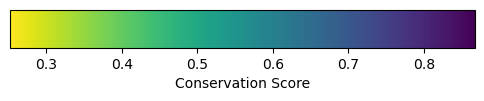

In [30]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)


fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label='Conservation Score')

fig.savefig(base_dir + os.sep + os.path.normpath('selected_proteins/ipath/ipath_input_cons_colorbar.svg'))